<a href="https://colab.research.google.com/github/aamirindi/ML_Projects/blob/main/Hand_Written_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hand Written Digit Prediction - Classification Analysis**

# **Objective**

**The digits dataset consists of 8x8 pixel images of digits. The images attributes of the dataset stores 8x8 arrays of grayscale values of each image.We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit image represents**

# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Import Data**

In [2]:
from sklearn.datasets import load_digits

In [3]:
df = load_digits()

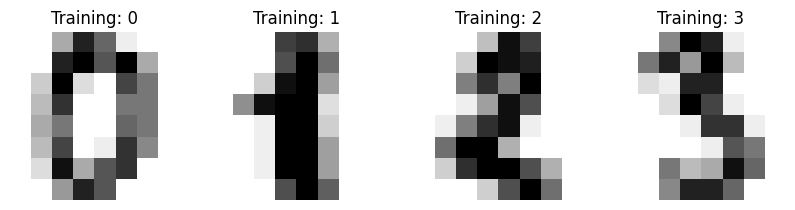

In [8]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title("Training: %i" % label)

# **Data Preprocessing**

Flattern Image

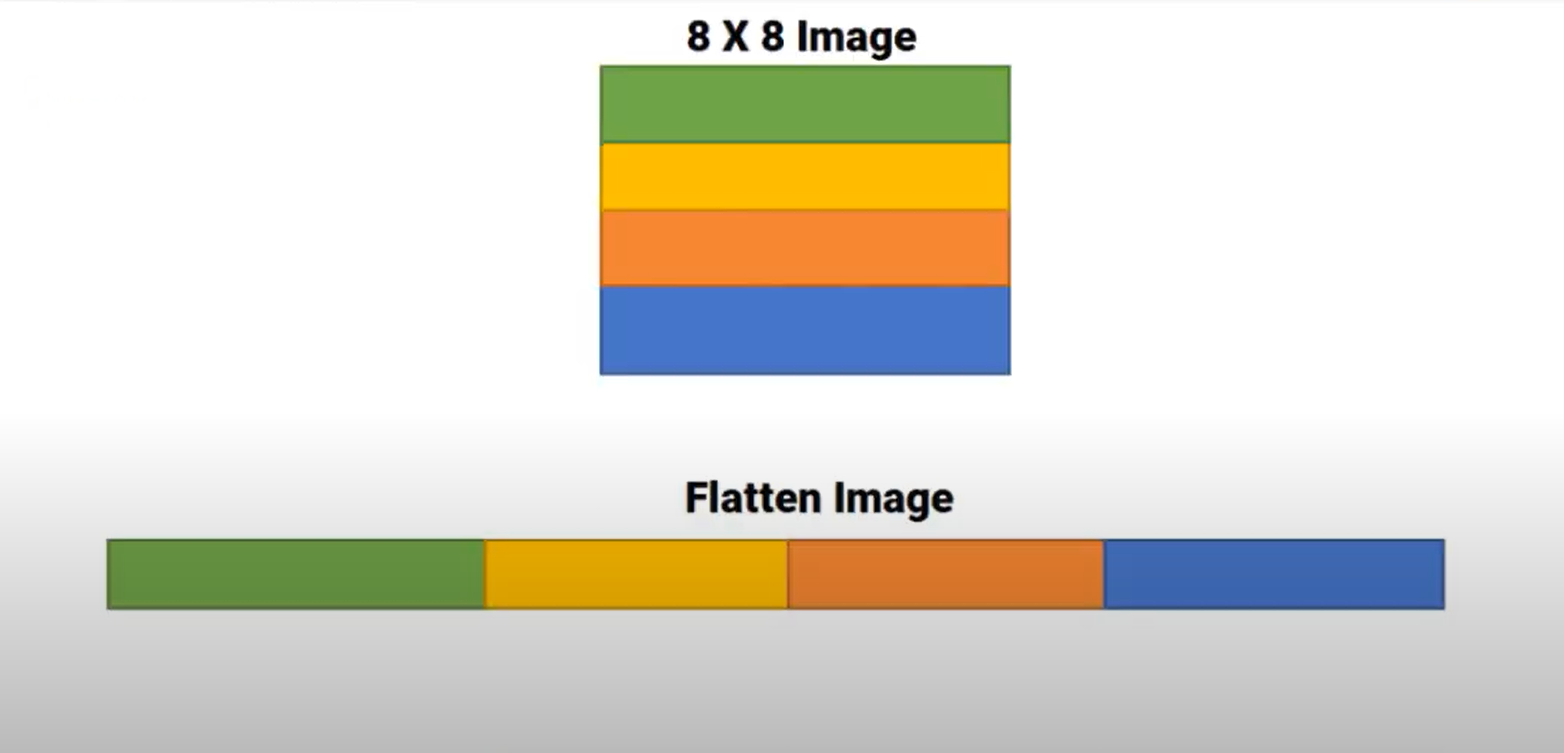

In [9]:
df.images.shape

(1797, 8, 8)

In [10]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

# **Scaling Image Data**

In [17]:
data.min()

0.0

In [19]:
data.max()

16.0

In [20]:
data = data/16

In [21]:
data.min()

0.0

In [22]:
data.max()

1.0

In [23]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# **Train Test Split Data**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# **Random Forest Model**

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rf = RandomForestClassifier()

In [31]:
rf.fit(X_train, y_train)

RandomForestClassifier()

# **Predict Test Data**

In [32]:
y_pred = rf.predict(X_test)

In [33]:
y_pred

array([8, 0, 8, 1, 5, 4, 2, 1, 7, 3, 6, 9, 0, 3, 8, 6, 1, 1, 2, 0, 5, 0,
       7, 1, 8, 5, 0, 0, 3, 2, 8, 3, 8, 7, 3, 8, 7, 8, 4, 3, 6, 4, 3, 5,
       8, 5, 4, 6, 7, 5, 6, 5, 9, 3, 2, 0, 0, 4, 6, 9, 0, 2, 7, 2, 5, 6,
       2, 9, 7, 6, 5, 3, 1, 2, 2, 2, 8, 9, 0, 9, 2, 1, 8, 3, 4, 7, 0, 8,
       5, 7, 5, 4, 6, 0, 1, 5, 5, 1, 2, 5, 1, 5, 0, 9, 3, 3, 6, 4, 9, 4,
       5, 6, 4, 4, 3, 4, 2, 4, 2, 3, 7, 6, 5, 2, 7, 2, 0, 1, 8, 8, 1, 1,
       4, 3, 9, 0, 0, 4, 3, 5, 2, 4, 6, 3, 7, 5, 0, 3, 7, 9, 7, 5, 5, 4,
       7, 7, 0, 7, 8, 3, 3, 9, 9, 7, 8, 4, 7, 6, 1, 2, 1, 3, 4, 9, 2, 3,
       7, 1, 3, 2, 5, 4, 7, 1, 1, 6, 5, 2, 4, 6, 3, 3, 4, 8, 1, 9, 6, 1,
       5, 4, 2, 6, 7, 0, 1, 8, 7, 1, 5, 7, 4, 7, 8, 7, 1, 5, 7, 1, 9, 4,
       5, 0, 3, 0, 0, 9, 9, 2, 7, 8, 0, 1, 0, 3, 0, 6, 5, 8, 0, 1, 9, 4,
       2, 7, 5, 1, 9, 0, 2, 5, 8, 1, 7, 0, 4, 3, 2, 0, 8, 3, 1, 0, 0, 6,
       0, 9, 3, 4, 2, 2, 1, 5, 5, 6, 6, 9, 3, 3, 8, 3, 6, 7, 3, 1, 8, 9,
       5, 3, 0, 4, 0, 0, 6, 5, 7, 3, 5, 5, 7, 7, 6,

# **Model Accuracy**

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
confusion_matrix(y_test, y_pred)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 57,  0,  2,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 48,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 51,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 40]])

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       0.98      1.00      0.99        57
           2       1.00      1.00      1.00        59
           3       0.98      0.90      0.94        63
           4       1.00      0.98      0.99        55
           5       0.94      0.98      0.96        50
           6       1.00      1.00      1.00        48
           7       0.93      1.00      0.97        56
           8       0.96      0.96      0.96        53
           9       0.95      0.91      0.93        44

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# **Explaination**

First of all, we imported library. Then we import our load_digits data form sklearn.datasets. By using matplotlib library in Python to create a grid of subplots to display images along with their corresponding labels.

1. _, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3)): This line creates a figure with a grid of subplots, arranged in a single row with 4 columns. The figsize parameter sets the width and height of the figure in inches. The axes variable will hold references to each subplot.

2. for ax, image, label in zip(axes, df.images, df.target): This line iterates over the axes variable, along with the df.images and df.target variables. df.images represents a collection of images, and df.target represents their corresponding labels. The zip() function is used to iterate over these variables simultaneously, assigning the current subplot to ax, the current image to image, and the current label to label.

3. ax.set_axis_off(): This line turns off the axis labels and ticks for the current subplot, making the image the sole focus of the plot.

4. ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest'): This line displays the current image on the current subplot using the imshow() function. The cmap parameter sets the color map to grayscale (plt.cm.gray_r), and the interpolation parameter specifies the method used to interpolate the image pixels.

5. ax.set_title("Training: %i" % label): This line sets the title of the current subplot to "Training: " followed by the current label value (%i is a placeholder for an integer value).

Overall, this code snippet is used to visualize a set of images with their corresponding labels in a grid of subplots, making it easier to understand and analyze the dataset.

Then we scale our image, where our data.max() should be 1.0. After that we train_test_split our data and then we use Random Forest Classification to predict the future values. The Model ACcurcay turn out to be 97%.